In [19]:
import pandas as pd 
import matplotlib.pyplot as plt 
import tensorflow as tf
dataset = pd.read_csv(r"https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [20]:
# one hot encoding our data 
dataset = pd.get_dummies(dataset)
dataset

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [21]:
# create the inpute and te output values 
X= dataset.drop("charges", axis =1 )
Y=dataset["charges"]
X.head() , Y

(   age     bmi  children  sex_female  sex_male  smoker_no  smoker_yes  \
 0   19  27.900         0           1         0          0           1   
 1   18  33.770         1           0         1          1           0   
 2   28  33.000         3           0         1          1           0   
 3   33  22.705         0           0         1          1           0   
 4   32  28.880         0           0         1          1           0   
 
    region_northeast  region_northwest  region_southeast  region_southwest  
 0                 0                 0                 0                 1  
 1                 0                 0                 1                 0  
 2                 0                 0                 1                 0  
 3                 0                 1                 0                 0  
 4                 0                 1                 0                 0  ,
 0       16884.92400
 1        1725.55230
 2        4449.46200
 3       21984.47061
 4     

In [22]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(X , Y , test_size=0.2 , random_state =42)
len(x_train) , len(y_train) , len(x_test) , len(y_test)

(1070, 1070, 268, 268)

In [23]:
# build the model 
from keras import Sequential
from keras.layers import Dense
model =  Sequential()
model.add(Dense(11))
model.add(Dense(1))
model.compile(loss = tf.keras.losses.mae , optimizer = tf.keras.optimizers.SGD() , metrics=["mae"])
model.fit(x_train , y_train , epochs = 100)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 8739.9209 - mae: 8739.9209
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 7541.1792 - mae: 7541.1792
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 7612.9609 - mae: 7612.9609
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 7781.7349 - mae: 7781.7349
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 7800.6479 - mae: 7800.6479
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 7451.6226 - mae: 7451.6226
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 7658.7783 - mae: 7658.7783
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7565.4189 - mae: 7565.4189
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7895.6328 - mae: 7895.6328
Epoch 10/100
34/34 [==============================] - 0s 3ms/step - loss: 7832.5386 - mae: 7832.5386

In [31]:
# make the model more performante 
#add extra hidden layers 
model_2 = Sequential([Dense(100),Dense(10),Dense(1)])
model_2.compile(loss = tf.keras.losses.mae , optimizer = tf.keras.optimizers.Adam(), metrics = ["accuracy"])
model_2.fit(x_train , y_train , epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 13287.3359 - accuracy: 0.0000e+00
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 13113.4062 - accuracy: 0.0000e+00
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 12769.7256 - accuracy: 0.0000e+00
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 12109.2295 - accuracy: 0.0000e+00
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 11007.7480 - accuracy: 0.0000e+00
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 9586.8672 - accuracy: 0.0000e+00
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 8262.8281 - accuracy: 0.0000e+00
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7573.1177 - accuracy: 0.0000e+00
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7448.6631 - accuracy: 0.0000e+00
Epoch 10/100
34/34 [=====================

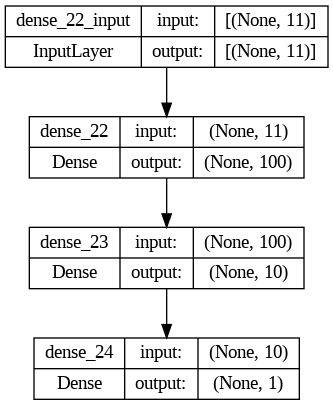

In [33]:
tf.keras.utils.plot_model(model_2,show_shapes=True)

In [37]:
# still have high loss 
model_3 = Sequential([Dense(100),Dense(10),Dense(1)])
model_3.compile(loss = tf.keras.losses.mae , optimizer = tf.keras.optimizers.Adam(), metrics = ["accuracy"])
history = model_3.fit(x_train , y_train , epochs=200)

Epoch 1/200
34/34 [==============================] - 1s 4ms/step - loss: 13297.0674 - accuracy: 0.0000e+00
Epoch 2/200
34/34 [==============================] - 0s 3ms/step - loss: 13127.5557 - accuracy: 0.0000e+00
Epoch 3/200
34/34 [==============================] - 0s 3ms/step - loss: 12762.2744 - accuracy: 0.0000e+00
Epoch 4/200
34/34 [==============================] - 0s 4ms/step - loss: 12042.8789 - accuracy: 0.0000e+00
Epoch 5/200
34/34 [==============================] - 0s 4ms/step - loss: 10848.2490 - accuracy: 0.0000e+00
Epoch 6/200
34/34 [==============================] - 0s 4ms/step - loss: 9348.5674 - accuracy: 0.0000e+00
Epoch 7/200
34/34 [==============================] - 0s 4ms/step - loss: 8054.1787 - accuracy: 0.0000e+00
Epoch 8/200
34/34 [==============================] - 0s 3ms/step - loss: 7497.9810 - accuracy: 0.0000e+00
Epoch 9/200
34/34 [==============================] - 0s 4ms/step - loss: 7410.0566 - accuracy: 0.0000e+00
Epoch 10/200
34/34 [=====================

Text(0.5, 0, 'epochs')

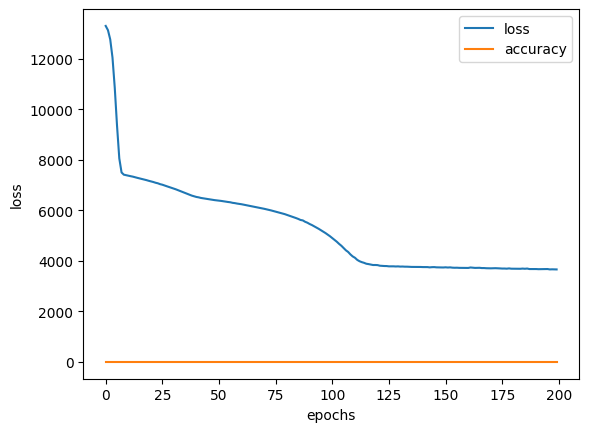

In [38]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [39]:
#that was a brief code about how can we evaluate our model by adding epochs , adding extra layers , changing the optimizers , normalization , standarazation ... etc